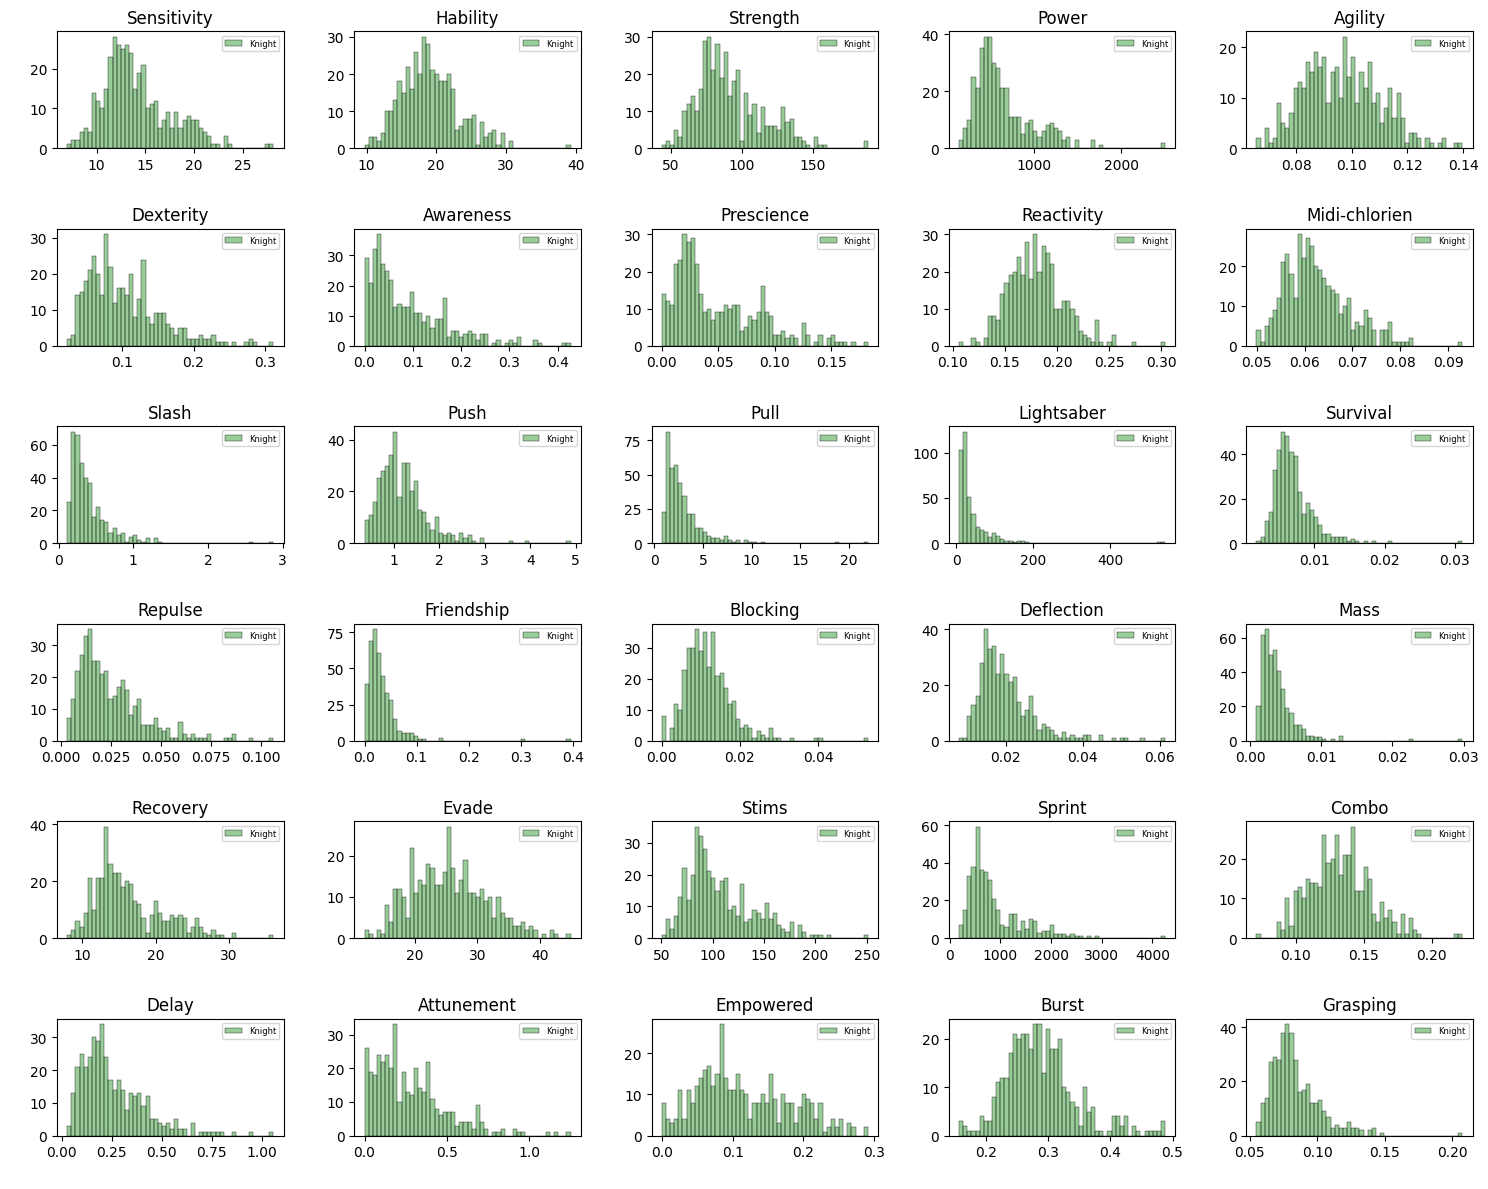

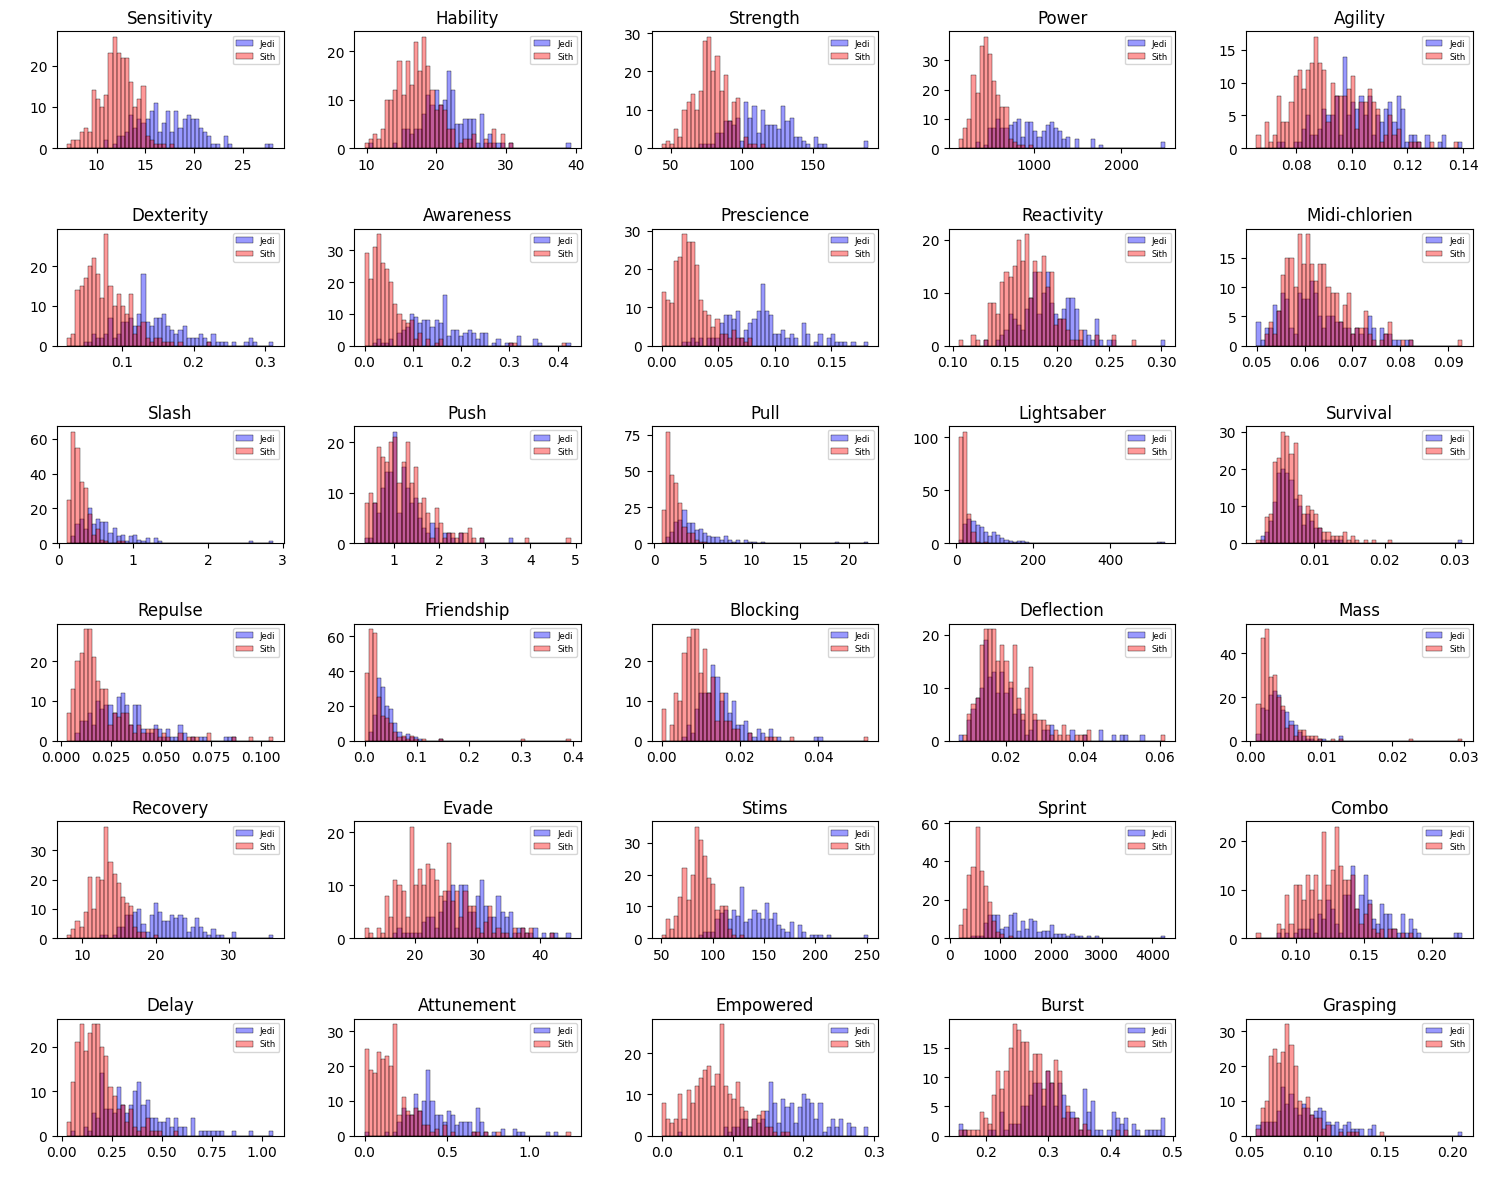

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./Knights/Train_knight.csv')

# Select only numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# Set up the grid size
num_items = len(numeric_cols)
cols = 5
rows = (num_items + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(3 * cols, 2 * rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(data=df,
                 x=col,
                 bins=50,
                 ax=axes[i],
                 kde=False,
                 color='green',
                 alpha=0.4)   
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel(' ')
    axes[i].set_ylabel(' ')
    axes[i].legend(['Knight'], loc='upper right', fontsize=6)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()




# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(3 * cols, 2 * rows))
axes = axes.flatten()  # Flatten 2D array of axes to 1D for easy indexing

# Plot each numeric column
for i, col in enumerate(numeric_cols):
    sns.histplot(data=df,
                 x=col,
                 bins=50,
                 ax=axes[i],
                 hue='knight',
                 palette=['red', 'blue'],
                 kde=False,
                 alpha=0.4)   
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel(' ')
    axes[i].set_ylabel(' ')
    axes[i].legend(['Jedi', 'Sith'], loc='upper right', fontsize=6)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [2]:
df['knight_numeric'] = df['knight'].map({'Jedi': 1, 'Sith': 0})

numeric_cols = df.select_dtypes(include='number').columns
correlations = df[numeric_cols].corrwith(df['knight_numeric'])
correlations_sorted = correlations.abs().sort_values(ascending=False)

corr_df = correlations_sorted.to_frame(name='correlation')
corr_df = corr_df.reset_index().rename(columns={'index': 'column'})
corr_df['correlation'] = corr_df['correlation'].round(6)
print(corr_df.to_string(index=False))

        column  correlation
knight_numeric     1.000000
     Empowered     0.793652
    Prescience     0.790066
         Stims     0.786797
      Recovery     0.777633
        Sprint     0.739672
      Strength     0.737403
   Sensitivity     0.721566
         Power     0.700709
     Awareness     0.699662
    Attunement     0.648893
     Dexterity     0.631987
         Delay     0.598072
         Slash     0.550663
          Pull     0.537800
    Lightsaber     0.515340
         Evade     0.465605
      Hability     0.446632
         Burst     0.445847
         Combo     0.445223
      Blocking     0.421950
       Agility     0.397458
    Reactivity     0.375103
      Grasping     0.350105
       Repulse     0.324399
    Friendship     0.236633
          Mass     0.113185
      Survival     0.043099
    Deflection     0.026489
          Push     0.019446
 Midi-chlorien     0.008132


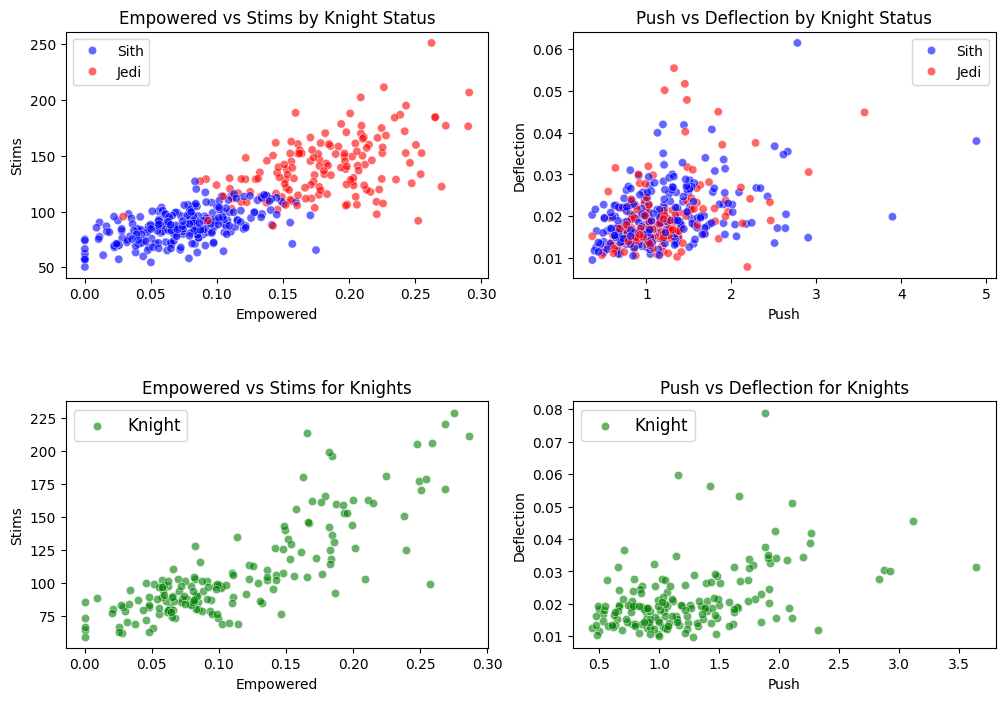

In [3]:
import seaborn as sns

df_train = pd.read_csv('./Knights/Train_knight.csv')
df_test = pd.read_csv('./Knights/Test_knight.csv')

plt.figure(figsize=(12, 8))
plt.subplots_adjust(hspace=0.5)

plt.subplot(2,2,1)
sns.scatterplot(data=df_train, x='Empowered', y='Stims', hue='knight', alpha=0.6, palette={'blue', 'red'})
plt.legend()
plt.title("Empowered vs Stims by Knight Status")

plt.subplot(2,2,2)
sns.scatterplot(data=df_train, x='Push', y='Deflection', hue='knight', alpha=0.6, palette=['blue', 'red'])
plt.legend()
plt.title("Push vs Deflection by Knight Status")


plt.subplot(2,2,3)
sns.scatterplot(data=df_test, x='Empowered', y='Stims', alpha=0.6, color='green')
plt.legend(['Knight'], loc='upper left', fontsize=12)
plt.title("Empowered vs Stims for Knights")

plt.subplot(2,2,4)
sns.scatterplot(data=df_test, x='Push', y='Deflection', alpha=0.6, color='green')
plt.legend(['Knight'], loc='upper left', fontsize=12)
plt.title("Push vs Deflection for Knights")
plt.show()



     Sensitivity  Hability  Strength     Power   Agility  Dexterity  \
291     4.099365 -0.155432  4.110430  5.458088  1.308834   0.939700   
232     3.897503  1.724139  4.042438  5.463995  0.881997   1.865967   
73      2.753617  1.242197  2.691101  3.237061  0.771608   0.482453   
319     2.689255  1.820527  2.852581  3.053944  1.301474   2.054361   
203     2.683404  0.704833  2.563616  3.056897 -0.884959   0.211638   
..           ...       ...       ...       ...       ...        ...   
390    -1.719826  0.381932 -1.636154 -1.320476 -0.174056   0.525627   
337    -1.726554 -0.548214 -1.702446 -1.326383 -0.766475  -0.869073   
311    -1.863177  1.536182 -1.860952 -1.394609 -1.135910  -1.078072   
296    -1.874294  1.524133 -1.845653 -1.419418 -0.716432   0.317609   
284    -2.082007 -1.369924 -2.039005 -1.498867  1.514893  -0.550178   

     Awareness  Prescience  Reactivity  Midi-chlorien  ...  Recovery  \
291   2.923992    2.936989   -0.577638      -1.112198  ...  2.554105   
232

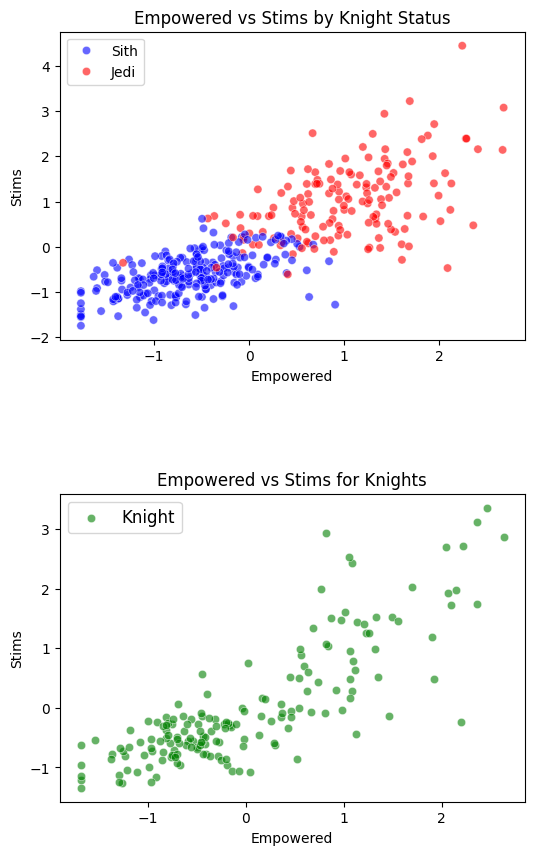

In [4]:
from sklearn.preprocessing import StandardScaler


numeric_cols_train = df_train.select_dtypes(include='number').columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_train[numeric_cols_train])
X_scaled_df = pd.DataFrame(X_scaled, columns=numeric_cols_train)
print(X_scaled_df.sort_values(by='Sensitivity', ascending=False))

X_scaled_df['knight'] = df_train['knight']

plt.figure(figsize=(6, 10))
plt.subplots_adjust(hspace=0.5)

plt.subplot(2, 1, 1)
sns.scatterplot(data=X_scaled_df, x='Empowered', y='Stims', hue='knight', alpha=0.6, palette=['blue', 'red'])
plt.legend()
plt.title("Empowered vs Stims by Knight Status")


numeric_cols_train = df_test.select_dtypes(include='number').columns
plt.subplot(2, 1, 2)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_test[numeric_cols_train])
X_scaled_df = pd.DataFrame(X_scaled, columns=numeric_cols_train)

print(X_scaled_df.sort_values(by='Sensitivity', ascending=False))

sns.scatterplot(data=X_scaled_df, x='Empowered', y='Stims', alpha=0.6, color='green')
plt.legend(['Knight'], loc='upper left', fontsize=12)
plt.title("Empowered vs Stims for Knights")
plt.show()

     Sensitivity  Hability  Strength     Power   Agility  Dexterity  \
291     1.000000  0.296246  1.000000  0.999152  0.654241   0.445062   
232     0.967343  0.560027  0.988943  1.000000  0.575905   0.608973   
73      0.782290  0.492391  0.769194  0.680170  0.555646   0.364148   
319     0.771878  0.573554  0.795453  0.653871  0.652890   0.642311   
203     0.770931  0.416977  0.748462  0.654295  0.251621   0.316224   
..           ...       ...       ...       ...       ...        ...   
390     0.058592  0.371660  0.065510  0.025620  0.382091   0.371788   
337     0.057504  0.241123  0.054730  0.024772  0.273366   0.124983   
311     0.035402  0.533649  0.028954  0.014973  0.205565   0.087998   
296     0.033603  0.531958  0.031442  0.011410  0.282550   0.334977   
284     0.000000  0.125803  0.000000  0.000000  0.692058   0.181414   

     Awareness  Prescience  Reactivity  Midi-chlorien  ...  Recovery  \
291   0.750704    0.874931    0.296970       0.123023  ...  0.717894   
232

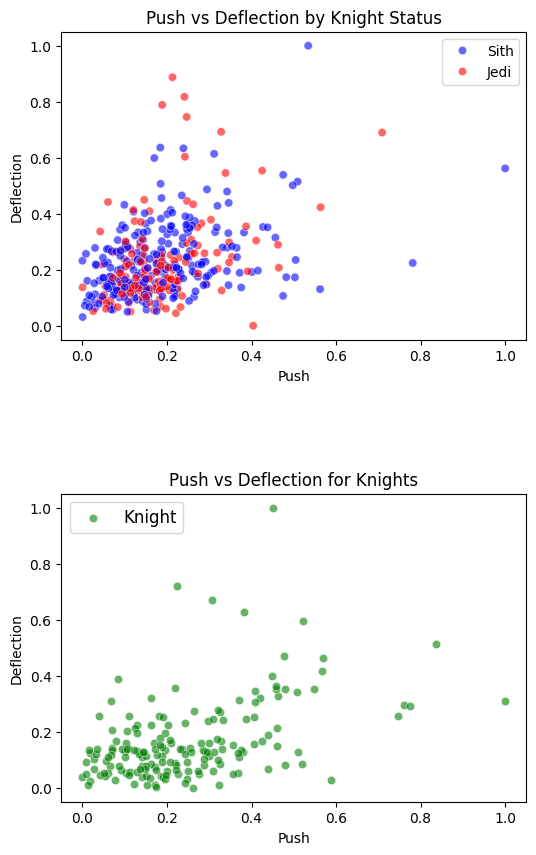

In [5]:
from sklearn.preprocessing import MinMaxScaler

numeric_cols_train = df_train.select_dtypes(include='number').columns
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df_train[numeric_cols_train])
X_scaled_df = pd.DataFrame(X_scaled, columns=numeric_cols_train)
print(X_scaled_df.sort_values(by='Sensitivity', ascending=False))

X_scaled_df['knight'] = df_train['knight']

plt.figure(figsize=(6, 10))
plt.subplots_adjust(hspace=0.5)

plt.subplot(2, 1, 1)
sns.scatterplot(data=X_scaled_df, x='Push', y='Deflection', hue='knight', alpha=0.6, palette=['blue', 'red'])
plt.legend()
plt.title("Push vs Deflection by Knight Status")


numeric_cols_train = df_test.select_dtypes(include='number').columns
plt.subplot(2, 1, 2)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df_test[numeric_cols_train])
X_scaled_df = pd.DataFrame(X_scaled, columns=numeric_cols_train)

print(X_scaled_df.sort_values(by='Sensitivity', ascending=False))

sns.scatterplot(data=X_scaled_df, x='Push', y='Deflection', alpha=0.6, color='green')
plt.legend(['Knight'], loc='upper left', fontsize=12)
plt.title("Push vs Deflection for Knights")
plt.show()